## Project: Titanic Survival Exploration ##

### Getting Started ###

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

%matplotlib inline

In [2]:
full_data = pd.read_csv('train.csv')
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def accuracy_score(truth, pred):
    '''
    Return accuracy score for input truth and predictions.
    '''
    
    if len(truth) == len(pred):
        return 'Predictions have an accuracy of {:.2f}%.'.format((truth == pred).mean() * 100)
    else:
        return 'Number of prediction does not match number of outcomes!'

predictions = pd.Series(np.ones(5, dtype=int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


### Making Predictions ###

In [5]:
def predictions_0(data):
    '''
    Model with no feature. Always predicts a passenger did not survived.
    '''
    
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_0(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


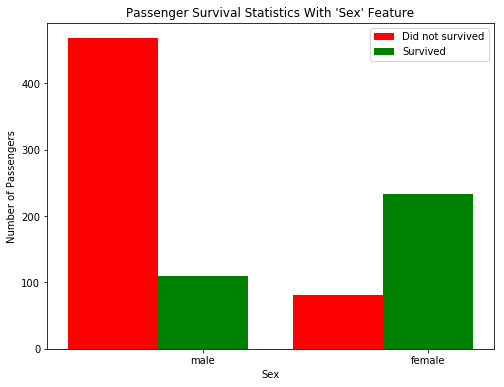

In [6]:
vs.survival_stats(data, outcomes, 'Sex')

In [7]:
def predictions_1(data):
    '''
    Model with one feature:
        - Predict a passenger survived if they are female.
    '''
    
    predictions = []
    for _, passenger in data.iterrows():
        s = 1 if passenger.Sex == 'female' else 0
        predictions.append(s)
    return pd.Series(predictions)

predictions = predictions_1(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


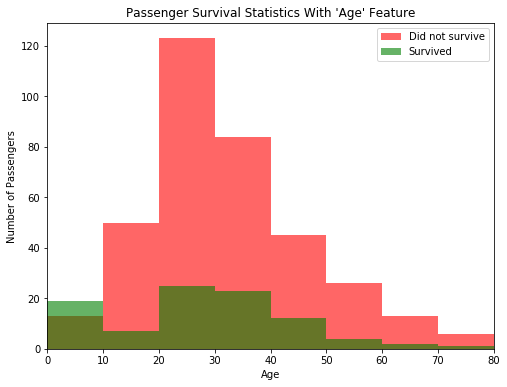

In [8]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [9]:
def predictions_2(data):
    '''
    Model with two features:
        - Predict a passenger survived if they are female.
        - Predict a passenger survived if they are male and younger then 10.
    '''
    
    predictions = []
    for _, passenger in data.iterrows():
        s = 1 if passenger.Sex == 'female' or passenger.Age < 10 else 0
        predictions.append(s)
    return pd.Series(predictions)

predictions = predictions_2(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


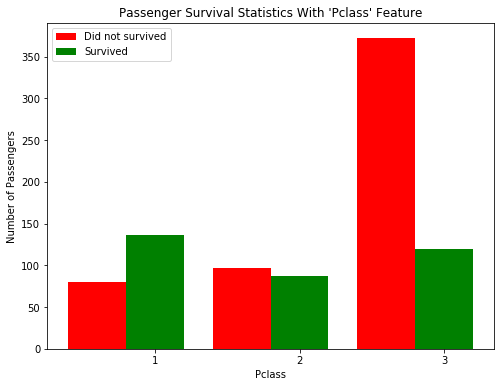

In [10]:
vs.survival_stats(data, outcomes, 'Pclass')

In [11]:
def predictions_3(data):
    '''
    Model with multiple features. Makes a prediction with an accuracy of at least 80%.
    '''
    
    predictions = []
    for _, passenger in data.iterrows():
        s = 0
        if passenger.Sex == 'female':
            s = 1
        if passenger.Pclass == 3:
            s = 0
        if passenger.Age < 8:
            s = 1
        predictions.append(s)
    return pd.Series(predictions)

predictions = predictions_3(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.02%.
